In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

install.packages("glmnet")
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models


# Generate data - Example 1
set.seed(19875)  # Set seed for reproducibility
n <- 1000  # Number of observations
p <- 5000  # Number of predictors included in model
real_p <- 15  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train (2/3) and test (1/3) sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

# Fit models 
# (For plots on left):
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)

# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
# (For plots on Right)
for (i in 0:10) {
  assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                            alpha=i/10,family="gaussian"))
}

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 300266 bytes (293 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

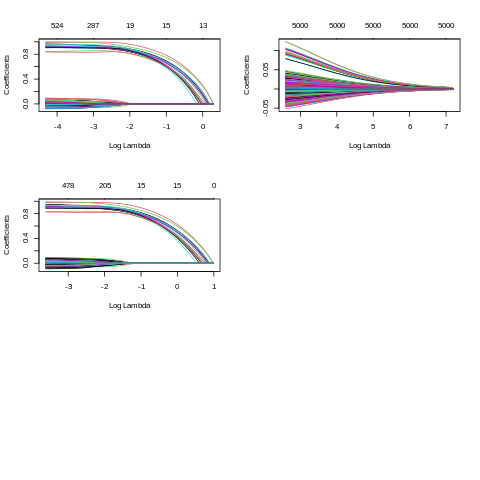

In [3]:
%%R

# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
#plot(fit10, main="LASSO")
plot(fit.ridge, xvar="lambda")
#plot(fit0, main="Ridge")
plot(fit.elnet, xvar="lambda")
#plot(fit5, main="Elastic Net")

In [ ]:
%%R

yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R